## Part2: Training a neural network

## Imports

In [23]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
import matplotlib.pyplot as plt
import tensorflow as tf
%run utils.ipynb import *

## Prepare the data

In [24]:
# load training data
train = read_data('train.csv')
# load testing data
test = read_data('test.csv')

In [26]:
# clean the data
X_train_scaled, y_train_encoded, X_test_scaled, y_train_unique_length = clean_data(train, test)

### Hyperparameters settings #1 : Learning rate Tuning

In [27]:
LEARNING_RATE_SCHEDULAR = LearningRateScheduler(lambda epoch: 1e-8 * 10**(epoch / 20))
batch_size = 64
HIDDEN_SIZE = 128
OPTIMIZER = SGD(learning_rate=1e-8)
DROPOUT_RATE = 0
DROPOUT = False

In [28]:
model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                     dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), batch_size, 
                       OPTIMIZER, LEARNING_RATE_SCHEDULAR, None)

Text(0, 0.5, 'Loss')

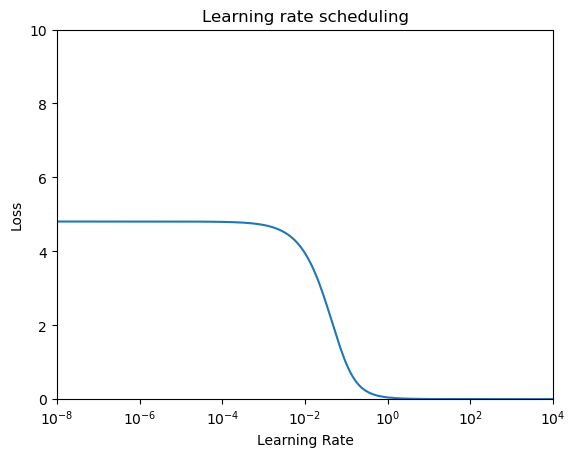

In [29]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs,history.history['loss'])
plt.axis([1e-8,10000,0,10])
plt.title('Learning rate scheduling')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

Text(0, 0.5, 'Loss')

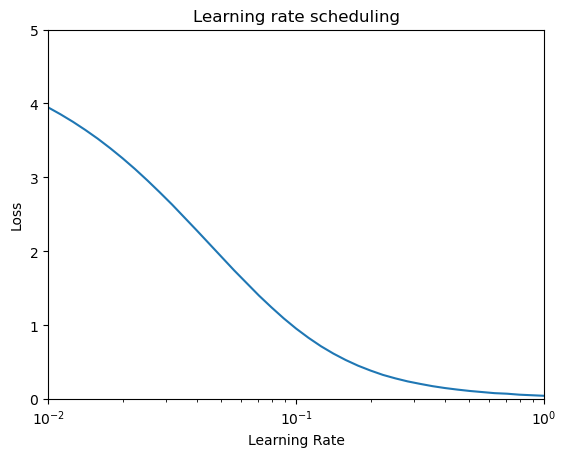

In [30]:
lrs = 1e-8 * (10 ** (np.arange(500) / 20))
plt.semilogx(lrs,history.history['loss'])
plt.axis([1e-2,1,0,5])
plt.title('Learning rate scheduling')
plt.xlabel('Learning Rate')
plt.ylabel('Loss')

We will choose 4 different learning rate values **6e-2** , **8e-2**, **2e-1** and **5e-1** as at these values from the graph the loss is lowest as possible

In [31]:
BATCH_SIZE = 64
HIDDEN_SIZE = 128
learning_rate = [6e-2,8e-2,2e-1,5e-1]
DROPOUT_RATE = 0
DROPOUT = False

### Training the model #1

Start training for learning rate = 0.06

The Evaluation of the model on the train data is:
Train loss = 0.038990166038274765
Train accuracy = 0.991919219493866

End training for learning rate = 0.06

Start training for learning rate = 0.08

The Evaluation of the model on the train data is:
Train loss = 0.03216257691383362
Train accuracy = 0.9939393997192383

End training for learning rate = 0.08

Start training for learning rate = 0.2

The Evaluation of the model on the train data is:
Train loss = 0.028497831895947456
Train accuracy = 0.9929292798042297

End training for learning rate = 0.2

Start training for learning rate = 0.5

The Evaluation of the model on the train data is:
Train loss = 0.017937300726771355
Train accuracy = 0.9939393997192383

End training for learning rate = 0.5



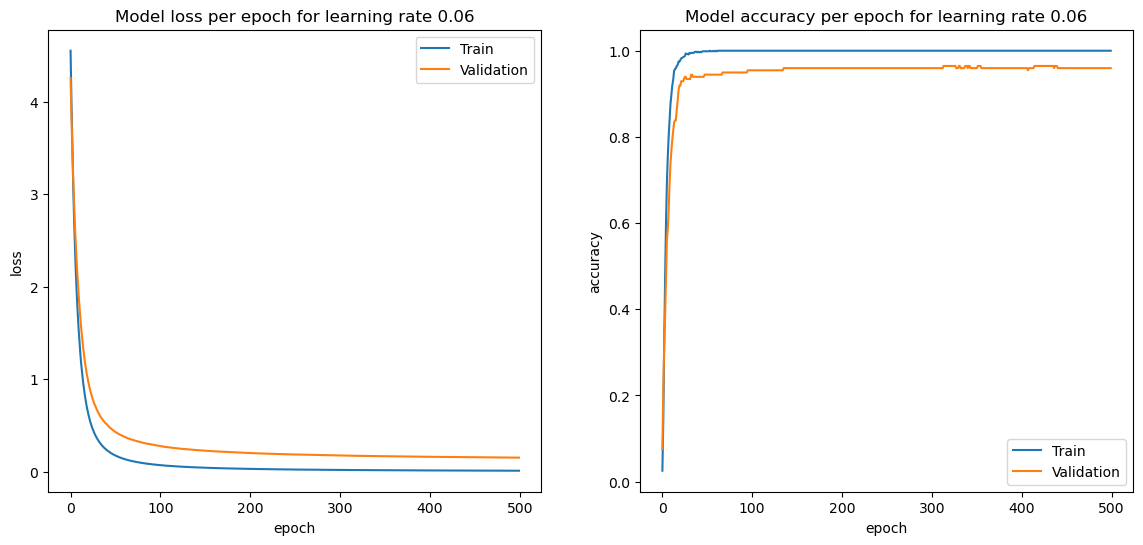

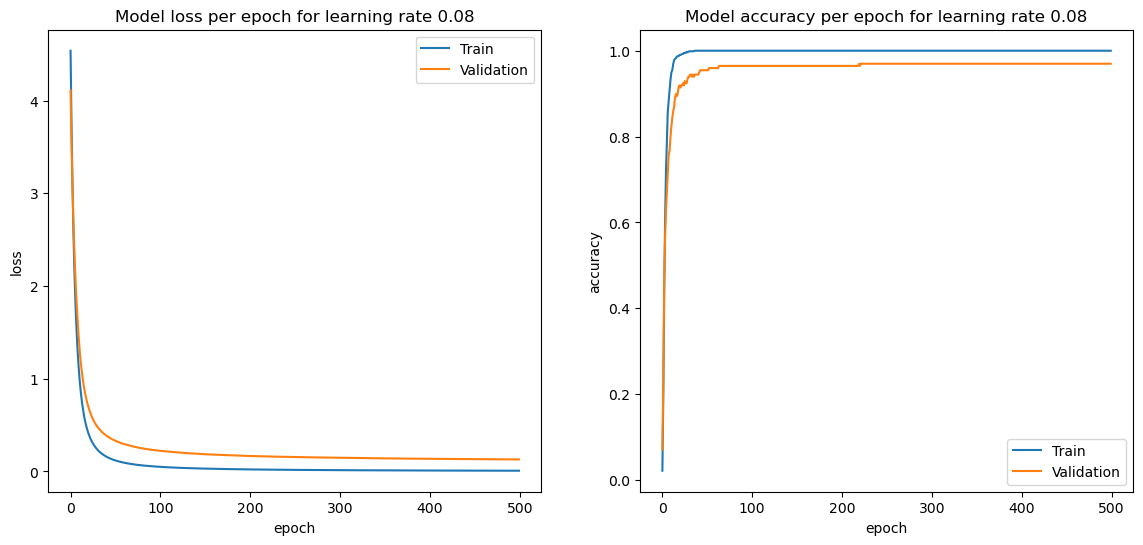

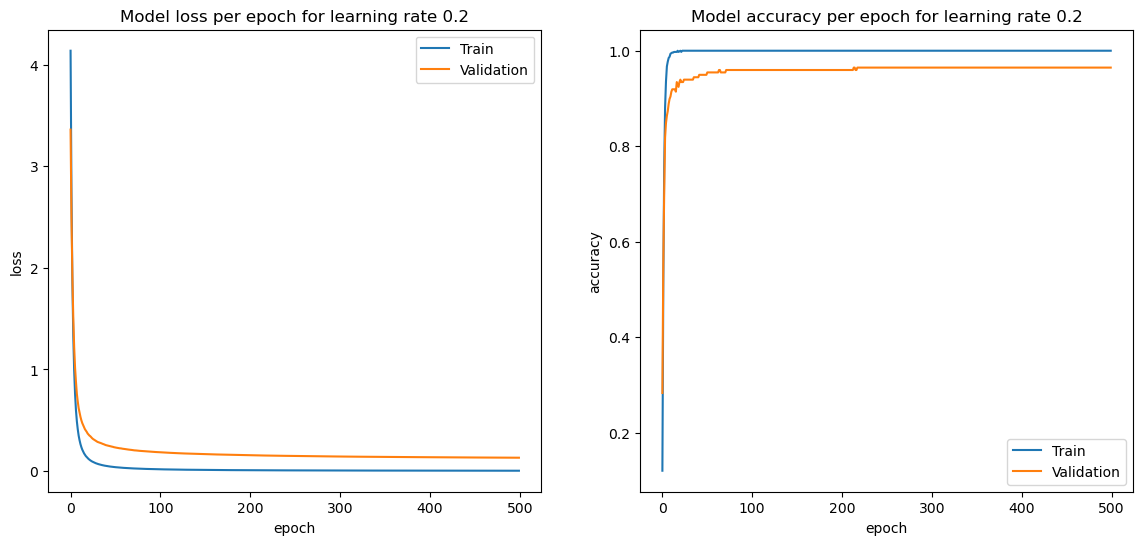

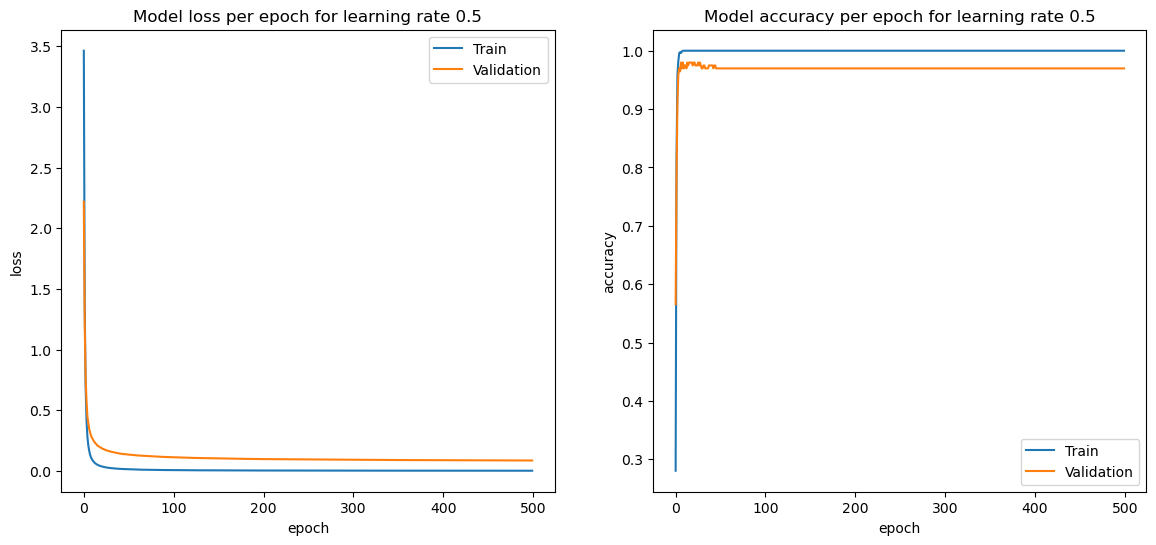

In [32]:
for lr in learning_rate:
    print('Start training for learning rate =', str(lr))
    OPTIMIZER = SGD(learning_rate=lr)
    model = DenseMLP(input_shape= X_train_scaled.shape, hidden_size= HIDDEN_SIZE, output_size= y_train_unique_length, 
                         dropout_rate= DROPOUT_RATE, dropout= DROPOUT)
    history = training(model, tf.cast(X_train_scaled,dtype=tf.float32), tf.cast(y_train_encoded,dtype=tf.int32), BATCH_SIZE, 
                           OPTIMIZER, None, None)
    train_curves(history,'for learning rate',lr)
    loss, acc = evaluation(model= model, X= X_train_scaled, y= y_train_encoded, batch_size= BATCH_SIZE)
    print('\nThe Evaluation of the model on the train data is:')
    print('Train loss =',loss)
    print('Train accuracy =', acc)
    print('\nEnd training for learning rate =', str(lr) + '\n')

So, from above the best learning rate to be used is **8e-2**